In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

2025-09-24 09:10:32.087140: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-24 09:10:32.195015: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-24 09:10:34.946214: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# Sử dụng thư viện tensorflow-keras

# Phần a

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


/home/tbao04/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-24 09:10:53.840027: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/tbao04/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
150/150 ━━━━━━━━━━━━━━━━━━━━ 57s 354ms/step - acc: 0.5076 - loss: 0.9641 - val_acc: 0.5613 - val_loss: 0.8448
Epoch 2/2
150/150 ━━━━━━━━━━━━━━━━━━━━ 54s 360ms/step - acc: 0.6333 - loss: 0.7130 - val_acc: 0.6400 - val_loss: 0.7600


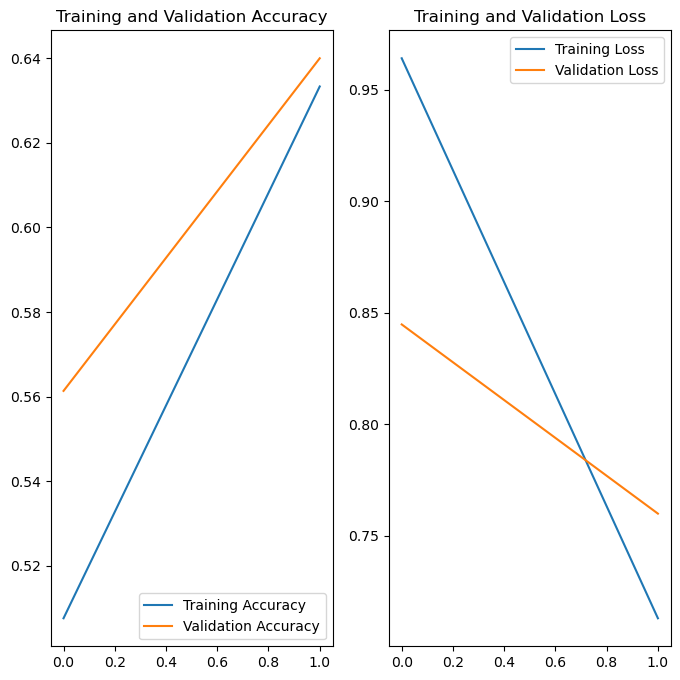

Training Accuracy: 0.6333333253860474
Testing Accuracy: 0.6399999856948853
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Dự đoán cho ảnh /home/tbao04/Documents/Data_Advance/CNN_MultiClass_data/validation/cats/cats_00003.jpg: chó (Độ tin cậy: 39.69%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Dự đoán cho ảnh /home/tbao04/Documents/Data_Advance/CNN_MultiClass_data/validation/dogs/dogs_00003.jpg: chó (Độ tin cậy: 52.61%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Dự đoán cho ảnh /home/tbao04/Documents/Data_Advance/CNN_MultiClass_data/validation/panda/panda_00003.jpg: gấu trúc (Độ tin cậy: 98.97%)


'gấu trúc'

In [ ]:
# Định nghĩa mô hình CNN (giữ nguyên như gốc)
def gen_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(rate=0.15),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(rate=0.1),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(rate=0.10),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy',
                  optimizer="adam",
                  metrics=['acc'])
    return model

# Huấn luyện và kiểm tra (giữ nguyên như gốc)
def train_test_animals():
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

    train_generator = train_datagen.flow_from_directory(
        '/home/tbao04/Documents/Data_Advance/CNN_MultiClass_data/animals',
        target_size=(150, 150),
        batch_size=15,
        class_mode='categorical',
        subset='training'
    )

    epochs = 2

    validation_generator = train_datagen.flow_from_directory(
        '/home/tbao04/Documents/Data_Advance/CNN_MultiClass_data/validation',
        target_size=(150, 150),
        batch_size=15,
        class_mode='categorical',
        subset='validation'
    )

    model = gen_model()
    history = model.fit(
        train_generator,
        steps_per_epoch=150,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=50,
        verbose=1
    )

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    print("Training Accuracy:", history.history['acc'][-1])
    print("Testing Accuracy:", history.history['val_acc'][-1])

    return model

# Hàm dự đoán cho ảnh riêng biệt
def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Chuẩn hóa
    prediction = model.predict(img_array)
    class_names = ['mèo', 'chó', 'gấu trúc']
    predicted_class = class_names[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    print(f"Dự đoán cho ảnh {img_path}: {predicted_class} (Độ tin cậy: {confidence:.2f}%)")
    return predicted_class

# Thực hiện huấn luyện và dự đoán
model = train_test_animals()

# Dự đoán trên một số ảnh mẫu (thay đường dẫn bằng ảnh thật của bạn)
predict_image(model, '/home/tbao04/Documents/Data_Advance/CNN_MultiClass_data/validation/cats/cats_00003.jpg')
predict_image(model, '/home/tbao04/Documents/Data_Advance/CNN_MultiClass_data/validation/dogs/dogs_00003.jpg')
predict_image(model, '/home/tbao04/Documents/Data_Advance/CNN_MultiClass_data/validation/panda/panda_00003.jpg')

# Phần b

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 327ms/step - accuracy: 0.4933 - loss: 0.7619 - val_accuracy: 0.6762 - val_loss: 0.6902
Epoch 2/2
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 299ms/step - accuracy: 0.4867 - loss: 0.6931 - val_accuracy: 0.5429 - val_loss: 0.6846


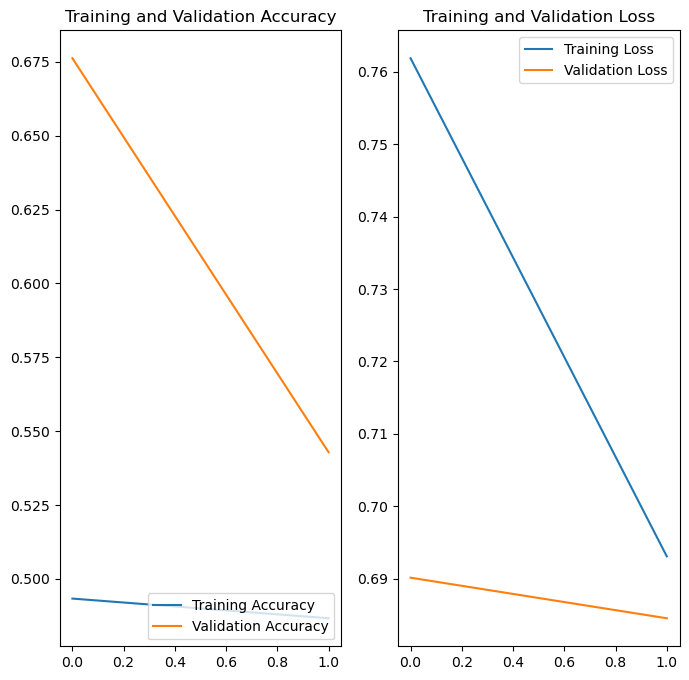

Training Accuracy: 0.4866666793823242
Validation Accuracy: 0.5428571701049805
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.6476 - loss: 0.6801
Dự đoán trên validation: Loss = 0.6801204681396484 , Accuracy = 0.6476190686225891


In [ ]:
# Định nghĩa mô hình CNN cho binary classification
def gen_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(rate=0.15),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(rate=0.1),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        keras.layers.Dropout(rate=0.10),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary output
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer="adam",
                  metrics=['accuracy'])
    return model

# Huấn luyện và kiểm tra cho binary
def train_test_animals_binary():
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

    train_generator = train_datagen.flow_from_directory(
        '/home/tbao04/Documents/Data_Advance/CNN_MultiClass_data/animals',
        target_size=(150, 150),
        batch_size=15,
        class_mode='binary',
        classes=['cats', 'dogs'],  # Chỉ chó và mèo
        subset='training'
    )

    epochs = 2

    validation_generator = train_datagen.flow_from_directory(
        '/home/tbao04/Documents/Data_Advance/CNN_MultiClass_data/validation',
        target_size=(150, 150),
        batch_size=15,
        class_mode='binary',
        classes=['cats', 'dogs'],  # Chỉ chó và mèo
        subset='validation'
    )

    model = gen_model()
    history = model.fit(
        train_generator,
        steps_per_epoch=20,  # 15*20=300 ảnh training
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=7,  # 15*7=105 ≈100 ảnh validation
        verbose=1
    )

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

    print("Training Accuracy:", history.history['accuracy'][-1])
    print("Validation Accuracy:", history.history['val_accuracy'][-1])

    # Chạy dự đoán kết quả trên validation
    val_loss, val_acc = model.evaluate(validation_generator, steps=7)
    print("Dự đoán trên validation: Loss =", val_loss, ", Accuracy =", val_acc)

    return model

# Thực hiện
model_binary = train_test_animals_binary()

# Nhận xét
- CNN thường vượt trội vì học đặc trưng đa tầng, thích ứng tốt với biến đổi (ánh sáng, góc nhìn), trong khi HOG cố định, dễ bị ảnh hưởng noise.
- Nếu CNN đạt >90%, HOG có thể chỉ 70-80%. Điều chỉnh hyperparams (như cell size trong HOG) để cải thiện.

# Sử dụng thư viện Pytorch

In [7]:
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
# 1. Chuẩn bị dữ liệu Intel Image Classification (6 lớp)
DATA_PATH = "/kaggle/input/intel-image-classification/"
data_dir = DATA_PATH + "seg_train/seg_train/"
test_data_dir = DATA_PATH + "seg_test/seg_test"

# Tiền xử lý dữ liệu
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor()
])

# Tải dữ liệu
dataset = datasets.ImageFolder(data_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_data_dir, transform=transform)

# Chia dữ liệu thành train và validation
val_size = 2000
train_size = len(dataset) - val_size
train_data, val_data = random_split(dataset, [train_size, val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

# Tạo DataLoader
batch_size = 128
train_dl = DataLoader(train_data, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_data, batch_size * 2, num_workers=4, pin_memory=True)


class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        images, labels = images.to(device), labels.to(device)
        out = self(images)  # Tạo dự đoán
        loss = F.cross_entropy(out, labels)  # Tính mất mát
        return loss

    def validation_step(self, batch):
        images, labels = batch
        images, labels = images.to(device), labels.to(device)
        out = self(images)  # Tạo dự đoán
        loss = F.cross_entropy(out, labels)  # Tính mất mát
        acc = accuracy(out, labels)  # Tính độ chính xác
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  # Kết hợp các mất mát
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()  # Kết hợp các độ chính xác
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

class NaturalSceneClassification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.Linear(82944, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 6)  # 6 lớp: buildings, forest, glacier, mountain, sea, street
        )

    def forward(self, xb):
        return self.network(xb)


def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds), device=outputs.device)

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history


model = NaturalSceneClassification()
model = model.to(device)
num_epochs = 5
lr = 0.001
opt_func = torch.optim.Adam
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Length of Train Data : 12034
Length of Validation Data : 2000
Epoch [0], train_loss: 1.2438, val_loss: 1.1919, val_acc: 0.5483
Epoch [1], train_loss: 0.8851, val_loss: 0.9465, val_acc: 0.6443
Epoch [2], train_loss: 0.6987, val_loss: 0.6563, val_acc: 0.7594
Epoch [3], train_loss: 0.5635, val_loss: 1.1878, val_acc: 0.6151
Epoch [4], train_loss: 0.5537, val_loss: 0.7376, val_acc: 0.7243
